<a href="https://colab.research.google.com/github/Azeemahma/DiabetesDetection-Dense-Net/blob/master/Diabetes_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv("C:\\Users\\aamis\\Downloads\\Project Exhibition 2 Datasets\\archive\\diabetes_prediction_dataset.csv")
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
dataset.shape

(100000, 9)

In [ ]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


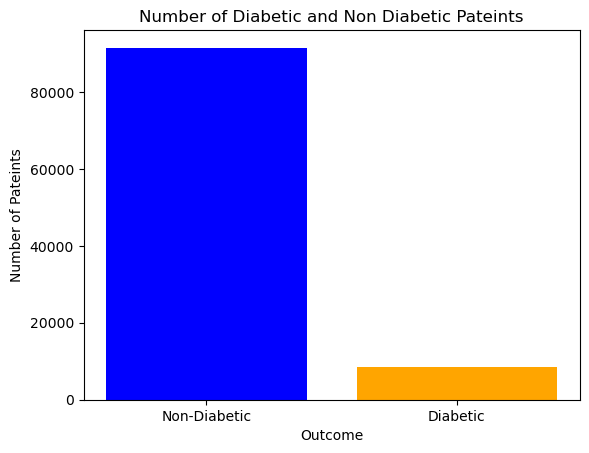

In [ ]:
df = pd.DataFrame(dataset)
outcome_counts = df['diabetes'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'orange'])
plt.xticks(outcome_counts.index, ['Non-Diabetic', 'Diabetic'])
plt.xlabel('Outcome')
plt.ylabel('Number of Pateints')
plt.title('Number of Diabetic and Non Diabetic Pateints')
plt.show()

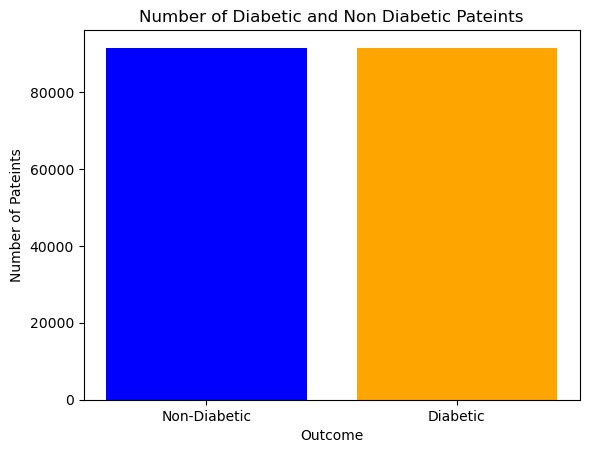

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Load your dataset
# Assuming your dataset is stored in a CSV file called 'your_dataset.csv'
df = pd.read_csv("C:\\Users\\aamis\\Downloads\\Project Exhibition 2 Datasets\\archive\\diabetes_prediction_dataset.csv")

# Convert categorical variables to numeric
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

# Separate features and target variable
X1 = df.drop(columns=['diabetes'])
y1 = df['diabetes']

# Apply RandomOverSampler to balance the dataset
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(X1, y1)

# Convert the resampled data back to a DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X1.columns)
balanced_df['diabetes'] = y_resampled

# Printing the balanced dataset
outcome_counts = balanced_df['diabetes'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'orange'])
plt.xticks(outcome_counts.index, ['Non-Diabetic', 'Diabetic'])
plt.xlabel('Outcome')
plt.ylabel('Number of Pateints')
plt.title('Number of Diabetic and Non Diabetic Pateints')
plt.show()

In [ ]:
X = df.drop(columns='diabetes', axis=1)
Y = df['diabetes']
scaler = StandardScaler()
scaler.fit(X)
standardised_data = scaler.transform(X)
X = standardised_data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, stratify = Y , random_state = 2)
print(X_train.shape,X_test.shape)
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train,Y_train)
train_dataset_prediction = classifier.predict(X_train)
train_dataset_accuracy = accuracy_score(train_dataset_prediction,Y_train)
print("Accuracy = ", train_dataset_accuracy)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
test_dataset_prediction = classifier.predict(X_test)
test_dataset_accuracy = accuracy_score(test_dataset_prediction,Y_test)
precision = precision_score(test_dataset_prediction, Y_test)
recall = recall_score(test_dataset_prediction, Y_test)
f1 = f1_score(test_dataset_prediction, Y_test)
print("Accuracy = ", test_dataset_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

(80000, 15) (20000, 15)
Accuracy =  0.960675
Accuracy =  0.96185
Precision: 0.6070588235294118
Recall: 0.9157054125998225
F1-score: 0.7301025822426601


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, stratify = Y , random_state = 2)
print(X_train.shape,X_test.shape)

(80000, 15) (20000, 15)


In [ ]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
train_dataset_prediction = classifier.predict(X_train)
train_dataset_accuracy = accuracy_score(train_dataset_prediction,Y_train)
print("Accuracy = ", train_dataset_accuracy)

Accuracy =  0.960675


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
test_dataset_prediction = classifier.predict(X_test)
test_dataset_accuracy = accuracy_score(test_dataset_prediction,Y_test)
precision = precision_score(test_dataset_prediction, Y_test)
recall = recall_score(test_dataset_prediction, Y_test)
f1 = f1_score(test_dataset_prediction, Y_test)
print("Accuracy = ", test_dataset_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy =  0.96185
Precision: 0.6070588235294118
Recall: 0.9157054125998225
F1-score: 0.7301025822426601


In [ ]:
# PREDICTION SYSTEM
input_data = ()
numpy_array = np.asarray(input_data)
data_reshaped = numpy_array.reshape(1,-1)
std_data = scaler.transform( data_reshaped)
prediction = classifier.predict(std_data)
if(prediction [0] == 0):
    print("The patient is non-diabetic")
else:
    print("The patient is diabetic")